# Distribution Feeder Modeling

## Creating a FeederModel

Import all required libraries for data profile, connection parameters, database, and feeder:

In [ ]:
import cimgraph.data_profile.rc4_2021 as cim
from cimgraph import ConnectionParameters
from cimgraph.databases.graphdb import GraphDBConnection
from cimgraph.databases.blazegraph import BlazegraphConnection
from cimgraph.models import FeederModel

In [ ]:
# GraphDB Connection
params = ConnectionParameters(url = "http://localhost:7200/repositories/cim_test", 
                              cim_profile='rc4_2021', iec61970_301=8)
graphdb = GraphDBConnection(params)

In [ ]:
# Blazegraph Connection
params = ConnectionParameters(url = "http://localhost:8889/bigdata/namespace/kb/sparql",
                              cim_profile='rc4_2021', iec61970_301=8)
blazegraph = BlazegraphConnection(params)

Create CIM EquipmentContainer object:

In [ ]:
feeder_mrid = "49AD8E07-3BF9-A4E2-CB8F-C3722F837B62"  # 13 bus
feeder = cim.Feeder(mRID=feeder_mrid)

In [ ]:
network = FeederModel(connection=graphdb, container=feeder, distributed=False)

In [ ]:
network = FeederModel(connection=blazegraph, container=feeder, distributed=False)


## Traversing the Property Graph

![sc-line-segment](./images/ac_line_segment.png)

In [ ]:
network.pprint(cim.ACLineSegment)

## Example 1: Expand the Property Graph by One Edge

In [ ]:
network.get_all_edges(cim.ACLineSegment)

![get-all-edges](./images/get_all_line_edge.png)

In [ ]:
network.pprint(cim.ACLineSegment)

## Example 2: Expand CIM-Graph to Find Bus and Phase of Each Line

In [ ]:
network.get_all_edges(cim.ACLineSegment)
network.get_all_edges(cim.ACLineSegmentPhase)
network.get_all_edges(cim.Terminal)

![traverse-graph](./images/traverse_graph.png)

In [ ]:
network.pprint(cim.ACLineSegmentPhase)

In [ ]:
for line in network.graph[cim.ACLineSegment].values():
    print('\n line mrid: ',line.mRID)
    print('line name:', line.name)
    print('bus 1: ', line.Terminals[0].ConnectivityNode.name)
    print('bus 2: ', line.Terminals[1].ConnectivityNode.name)
    
    for line_phs in line.ACLineSegmentPhases:
        print('phase:', line_phs.phase, ', sequence:', line_phs.sequenceNumber)

## Example 3: Get All Measurements
All SCADA points are associated in memory with the correct power system objects

In [ ]:
network.get_all_edges(cim.Analog)
network.get_all_edges(cim.Discrete)

In [ ]:
for line in network.graph[cim.ACLineSegment].values():
    for meas in line.Measurements:
        print('Measurement: ', meas.name,  ', type:', meas.measurementType, ', phases:', meas.phases)

## Example 4: Get all line impedances and physical asset info

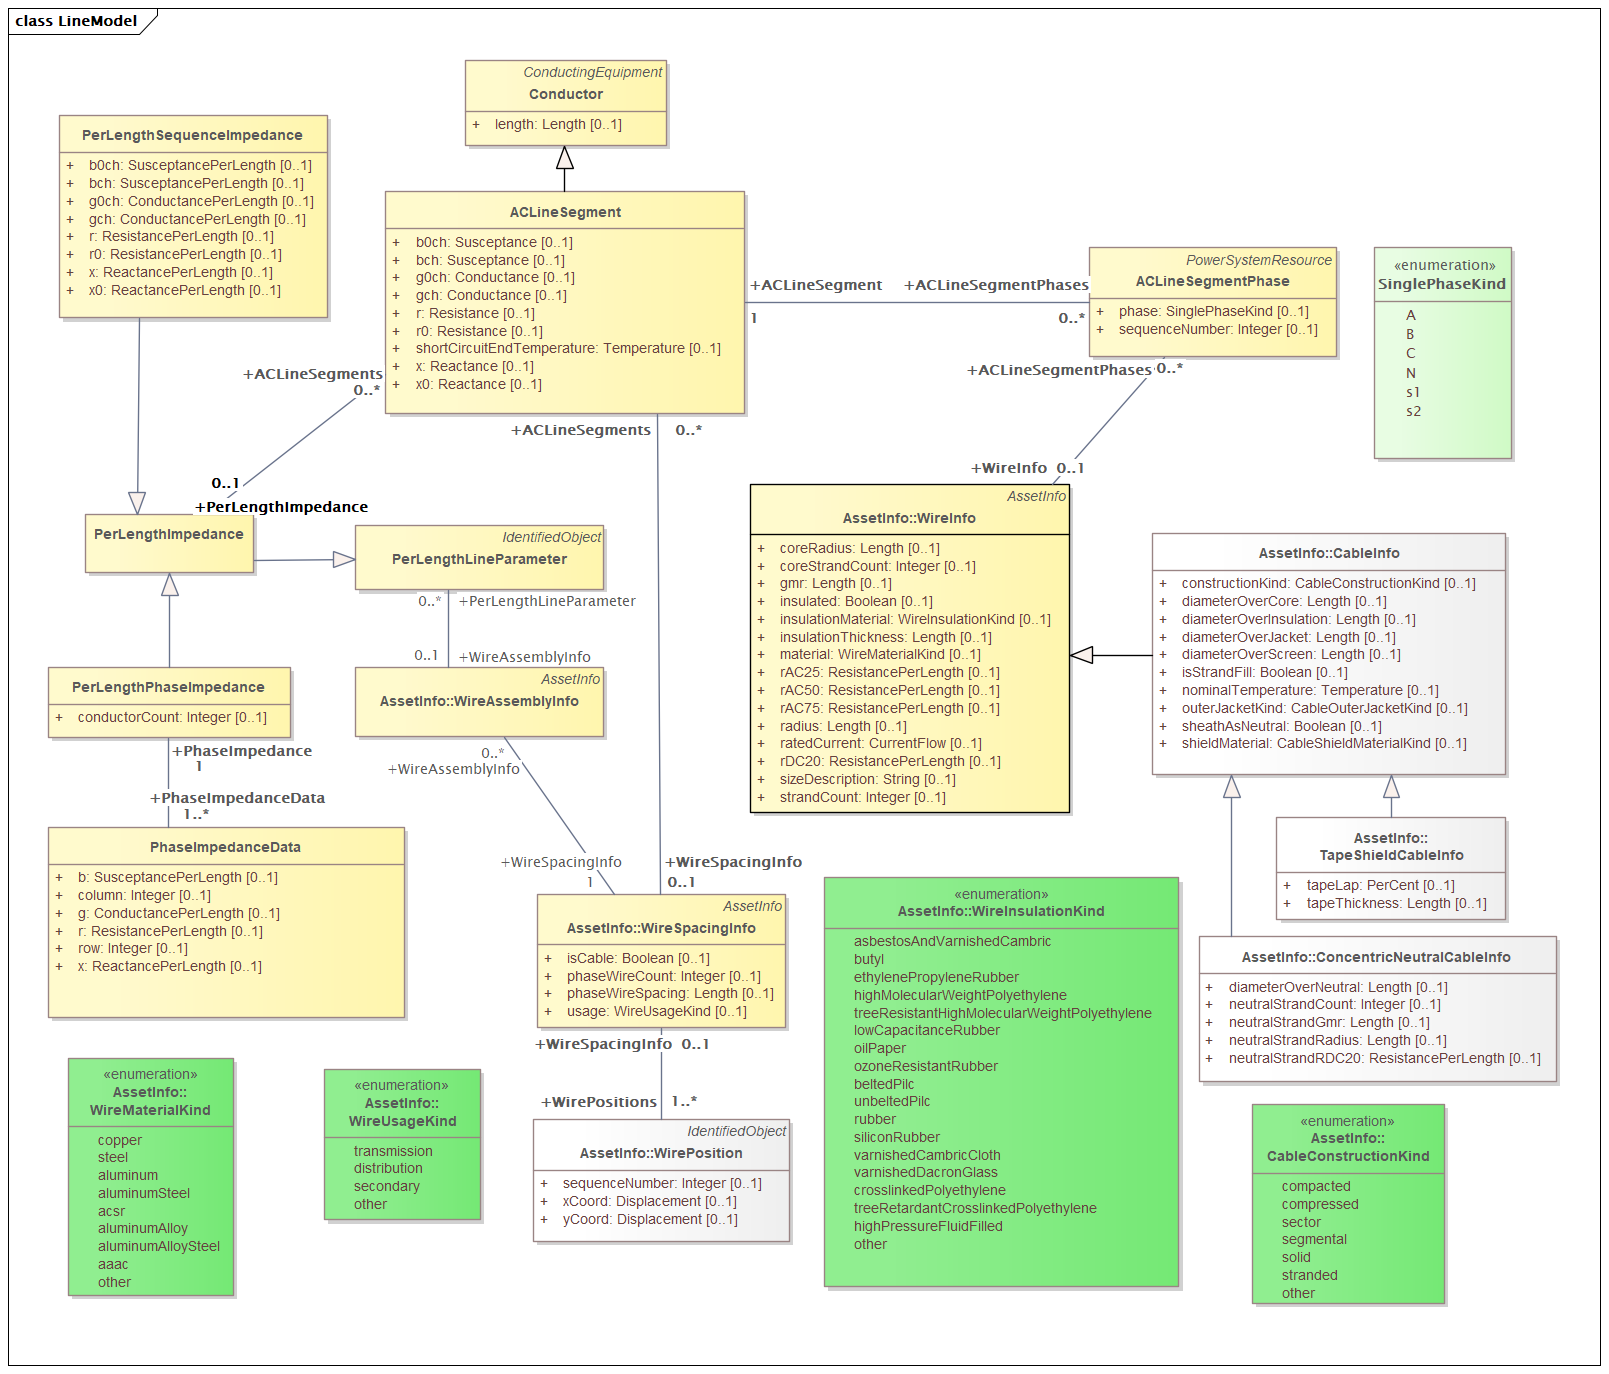

In [ ]:
network.get_all_edges(cim.ACLineSegment)
network.get_all_edges(cim.ACLineSegmentPhase)
network.get_all_edges(cim.PerLengthPhaseImpedance)
network.get_all_edges(cim.PhaseImpedanceData)
network.get_all_edges(cim.WireSpacingInfo)
network.get_all_edges(cim.WirePosition)
network.get_all_edges(cim.OverheadWireInfo)
network.get_all_edges(cim.ConcentricNeutralCableInfo)
network.get_all_edges(cim.TapeShieldCableInfo)
network.get_all_edges(cim.Terminal)

### Example 4.1: Parse by PSR:

In [ ]:
for line in network.graph[cim.ACLineSegment].values():
    print('\n line mrid: ', line.mRID)
    print('line name:', line.name)

    for line_phs in line.ACLineSegmentPhases:
        print('phase ', line_phs.phase, ': ', line_phs.mRID)
        if line_phs.WireInfo is not None:
            print('type: ', line_phs.WireInfo.__class__.__name__)
            print('gmr: ', line_phs.WireInfo.gmr)
            print('insulated: ', line_phs.WireInfo.insulated)

    if line.WireSpacingInfo is not None:
        for position in line.WireSpacingInfo.WirePositions:
            print('seq:', position.sequenceNumber, ' x:', position.xCoord, ' y:', position.yCoord)    

    if line.PerLengthImpedance is not None:
        for data in line.PerLengthImpedance.PhaseImpedanceData:
            print('row:', data.row, 'col:', data.column, 'r:', data.r, 'x:', data.x, 'b:', data.b)

### Example 4.2: Parse by Asset

In [ ]:
for impedance in network.graph[cim.PerLengthPhaseImpedance].values():
    print('\n name:', impedance.name)
    for data in impedance.PhaseImpedanceData:
            print('row:', data.row, 'col:', data.column, 'r:', data.r, 'x:', data.x, 'b:', data.b)
    for line in impedance.ACLineSegments:
        node1 = line.Terminals[0].ConnectivityNode
        node2 = line.Terminals[1].ConnectivityNode
        print('Line: ', line.name)
        print('Buses:', node1.name, node2.name)

In [ ]:
for line in network.graph[cim.ACLineSegment].values():
    for meas in line.Measurements:
        print('Measurement: ', meas.name,  ', type:', meas.measurementType, ', phases:', meas.phases)